<div style="font-weight: bold" align="center">
    <div style="font-size: xx-large; color:#3d6f91">Computación Numérica</div><br>
    <div style="font-size: x-large; color:gray">Práctica 1</div><br>
    <div style="font-size: large; color: #5D8AA8">Óscar Gómez Borzdynski y Alejandro Cabana Suárez</div><br></div><hr>
</div>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mostrar o esconder código"></form>''')

In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np

In [3]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b {color: #5D8AA8;}
</style>

## Cuestiones teóricas
<b>1- Dado que el redondeo en base 10 de la suma de dos números es $\mp$0,5 ∗ $\epsilon$, y que el dígito eliminado es aleatorio ¿podemos suponer que el redondeo es una variable aleatoria uniforme?</b>

No podemos suponer que es una variable aleatoria uniforme dado que esperamos que el error de redondeo en cada uno de los números sí sea uniforme, pero la suma de dos distribuciones uniformes no resulta en una distribución uniforme.

<b>2- Si dibujo la gráfica del error por redondeo ¿Como debería ser dicha gráfica?</b>

Sería una gráfica discontinua con bandas diagonales de pendiente 1 que van separándose según nos alejamos del 0 en ambas direcciones.

<b>3- Si asumimos que el error de redondeo es una variable aleatoria uniforme entre −0,5 ∗ $\epsilon$ y +0,5 ∗ $\epsilon$ ¿Cuál debería ser error absoluto promedio de la suma (o el producto) de un número elevado de números en coma flotante?, da una respuesta razonada.</b>

El promedio del error será 0 por el teorema central del límite. Dado que el error por redondeo es una variable aleatoria uniforme de media 0, una suma o producto de un número elevado de ellos hará que el resultado sea una variable aleatoria que tiende a una normal con media la suma de las medias. 

# Ejercicio 1
En este primer ejercicio dibujamos la función

$f(x) = \frac{4x^4-59x^3+324x^2-751x+622}{x^4 - 14x^3 + 72x^2 - 151x +112}$ 

evaluada en el intervalo $\left[1.606 + 2^{-52}, 1.606 + 800\times2^{-52}\right]$ tomando 800 muestras equidistantes a una distancia de $2^{-52}$.

En primer lugar podemos observar que los incrementos coinciden con el valor épsilon de nuestra máquina.

In [4]:
print('Incremento:',2**-52, '\nÉpsilon:   ', sys.float_info.epsilon)

Incremento: 2.220446049250313e-16 
Épsilon:    2.220446049250313e-16


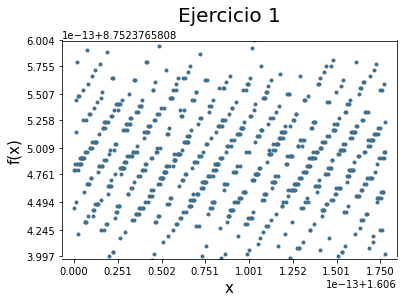

In [5]:
def f(x):
    return (4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622)/(x**4 - 14*x**3 + 72*x**2 - 151*x + 112)

values = [1.606 + i*2**-52 for i in range(801)]
fun_values = [f(i) for i in values]
plt.plot(values, fun_values, '.', color='#3d6f91')
plt.title("Ejercicio 1", fontsize=20, pad=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.xlim(min(values) - 30*2**-52, max(values) + 30*2**-52)
_ = plt.ylim(8.7523765807784,8.7523765807786)

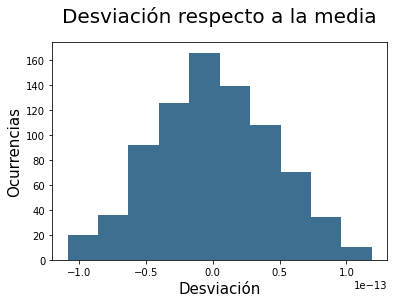

In [6]:
fun_values = np.array(fun_values)
plt.hist(fun_values-fun_values.mean(), color='#3d6f91')
plt.title("Desviación respecto a la media", fontsize=20, pad=20)
plt.xlabel('Desviación', fontsize=15)
_ = plt.ylabel('Ocurrencias', fontsize=15)

<b>¿Sale una figura continua? ¿Por qué? ¿Puedes explicar el patrón que sale? ¿Qué
consecuencias puedes sacar sobre el redondeo?</b>

La figura no es continua porque los valores representados se encuentran en una escala lo suficientemente pequeña $\left(10^{-13}\right)$ para poder apreciar los saltos discretos del error por redondeo.

En la segunda figura podemos apreciar que los valores siguen una distribución normal provocada por la suma de un numero elevado de variables aleatorias uniformes. El patrón obtenido es una serie de lineas diagonales que pensamos que pueden estar relacionadas con la pendiente de la función en los puntos en los que estamos evaluando. Los valores evaluados son ligeramente anteriores a un máximo de la función, con lo cual la pendiente es positiva pero muy cercana a 0. Dado que el error absoluto de una función es proporcional a la derivada de la misma, pensamos que estas lineas pueden tener como pendiente la derivada de la función.

La conclusión a la que llegamos es que al realizar muchas operaciones de suma y producto, el error por redondeo de cada una se va acumulando y esto genera grandes variaciones respecto al valor real de la función.

# Ejercicio 2
En este ejercicio aplicamos la regla de Horner a la función anterior. Obteniendo el siguiente cálculo:

$f(x) = \frac{622 + x(-751 + x(324 +x(-59 +4x)))}{112 + x(-151 + x(72 + x(-14 + x)))}$.

Evaluamos en los mismos puntos que el ejercicio anterior

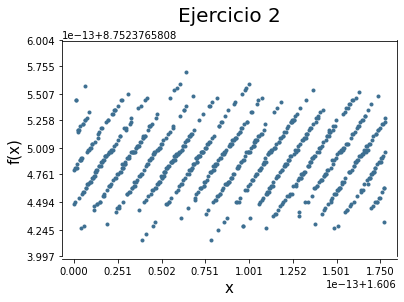

In [7]:
def f(x):
    return (622 + x*(-751 + x*(324 +x*(-59 +4*x))))/(112 + x*(-151 + x*(72 + x*(-14 + x))))

values = [1.606 + i*2**-52 for i in range(801)]
fun_values = [f(i) for i in values]
plt.plot(values, fun_values, '.', color='#3d6f91')
plt.title("Ejercicio 2", fontsize=20, pad=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.xlim(min(values) - 30*2**-52, max(values) + 30*2**-52)
_ = plt.ylim(8.7523765807784,8.7523765807786)

<b>¿Observas alguna diferencia con la gráfica anterior?</b>

Observamos el mismo patrón que antes pero con menor varianza. Esto se debe a que la varianza de la distribución del error es proporcional a la suma de las varianzas de las distribuciones uniformes que la componen. Dado que realizamos menos operaciones acumulamos menos errores de redondeo.

# Ejercicio 3
Finalmente se realiza un último análisis obteniendo la siguiente expresión:
    
$f(x) = 4- \frac{3(x-2)[(x-5)^2 + 4]}{x + (x - 2)^2  [(x-5)^2 + 3]}$.

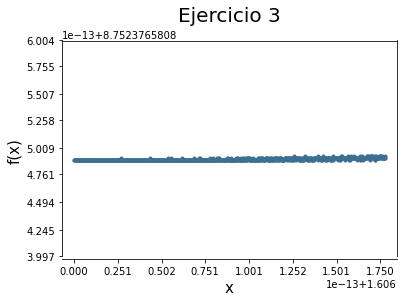

In [8]:
def f(x):
    return 4 - (3*(x-2)*((x-5)**2 + 4))/(x + (x - 2)**2 * ((x-5)**2 + 3))

values = [1.606 + i*2**-52 for i in range(801)]
fun_values = [f(i) for i in values]
plt.plot(values, fun_values, '.', color='#3d6f91')
plt.title("Ejercicio 3", fontsize=20, pad=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.xlim(min(values) - 30*2**-52, max(values) + 30*2**-52)
_ = plt.ylim(8.7523765807784,8.7523765807786)

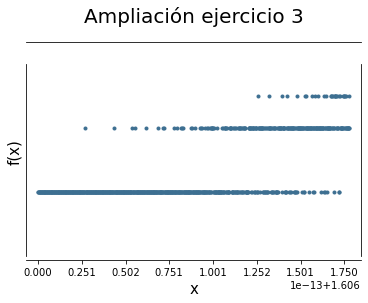

In [9]:
fun_values = [f(i) for i in values]
plt.plot(values, fun_values, '.', color='#3d6f91')
plt.title("Ampliación ejercicio 3", fontsize=20, pad=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.xlim(min(values) - 30*2**-52, max(values) + 30*2**-52)
_ = plt.ylim(8.752376580778485,8.752376580778494)

<b>¿Observas alguna diferencia con las gráficas anteriores?</b>

Podemos ver el mismo fenómeno que en el ejercicio 2 pero con menos variación en el error. Esto se puede deber a que las constantes que aparecen son más pequeñas que en los apartados anteriores.

# Cuestiones

<b>¿Las tres funciones que hemos pintado son la misma función, solo que escrita de diferente manera? Da una respuesta razonada.</b>

Sí, a nivel teórico son equivalentes. Sin embargo, al implementar cada una de ellas estamos realizando operaciones distintas con errores de redondeo distintos en cada caso y esto es lo que produce las diferencias en las gráficas.

<b>¿Podemos afirmar ahora que la distribución del error por redondeo es una variable aleatoria uniforme?</b>

En el caso del error por redonde producido al intentar representar un valor $x \in \mathbb{R}$ en la máquina, es razonable considerarlo una variable aleatoria uniforme. Por el contrario, al operar con números representados de esta manera, el error por redondeo deja de ser una v.a. uniforme y tiende a una normal conforme crece el número de operaciones, como se ha visto en el ejercicio 1.

<b>Comenta los resultados obtenidos.</b>

Teniendo en cuenta lo que hemos comentado en los ejercicios anteriores vemos que debemos tener en cuenta el error por redondeo a la hora de implementar funciones numéricas ya que puede afectar en gran medida a los resultados obtenidos.

# Nos molan los fenómenos numéricos paranormales
<img src="https://media1.tenor.com/images/7b3ccb7952e24506d7465a783c18ef64/tenor.gif?itemid=13371742" alt="Italian Trulli" style="float: left; padding-left:140px">

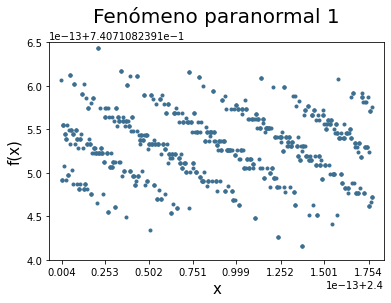

In [10]:
def f(x):
    return (4*x**4 - 59*x**3 + 324*x**2 - 751*x + 622)/(x**4 - 14*x**3 + 72*x**2 - 151*x + 112)

values = [2.4 + i*2**-52 for i in range(801)]
fun_values = [f(i) for i in values]
plt.plot(values, fun_values, '.', color='#3d6f91')
plt.title("Fenómeno paranormal 1", fontsize=20, pad=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.xlim(min(values) - 30*2**-52, max(values) + 30*2**-52)
_ = plt.ylim(.7407108239094,.74071082390965)




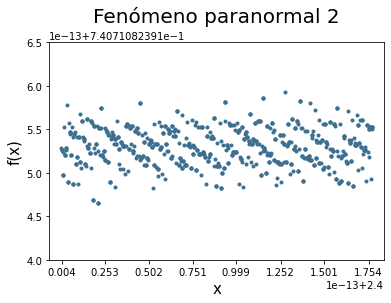

In [11]:
def f(x):
    return (622 + x*(-751 + x*(324 +x*(-59 +4*x))))/(112 + x*(-151 + x*(72 + x*(-14 + x))))

values = [2.4 + i*2**-52 for i in range(801)]
fun_values = [f(i) for i in values]
plt.plot(values, fun_values, '.', color='#3d6f91')
plt.title("Fenómeno paranormal 2", fontsize=20, pad=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.xlim(min(values) - 30*2**-52, max(values) + 30*2**-52)
_ = plt.ylim(.7407108239094,.74071082390965)

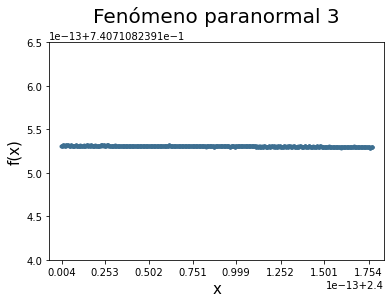

In [12]:
def f(x):
    return 4 - (3*(x-2)*((x-5)**2 + 4))/(x + (x - 2)**2 * ((x-5)**2 + 3))

values = [2.4 + i*2**-52 for i in range(801)]
fun_values = [f(i) for i in values]
plt.plot(values, fun_values, '.', color='#3d6f91')
plt.title("Fenómeno paranormal 3", fontsize=20, pad=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)

plt.xlim(min(values) - 30*2**-52, max(values) + 30*2**-52)
_ = plt.ylim(.7407108239094,.74071082390965)

<b>¿Qué cambio has observado? ¿Podrías explicar por qué ha cambiado la dirección del patrón?</b>

Como podemos ver, los resultados son bastante similares con la única diferencia de que las diagonales tienen pendiente negativa. Esto encaja con nuestra hipíotesis anterior de que la pendiente de estas diagonales tiene que ver con la derivada de la función en ese punto, en este caso nos situamos justo antes de un mínimo, donde la derivada de la función es muy pequeña y negativa.